In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pysar.objects import timeseries
from pysar.utils import utils as ut, readfile, ptime, plot as pp
from pysar.simulation.plot import *

work_dir = os.path.expanduser('~/insarlab/Galapagos/GalapagosSenDT128/PYSAR')
os.chdir(work_dir)
print('Go to directory', work_dir)

geom_file = './INPUTS/geometryRadar.h5'
ts_file = 'timeseries_ECMWF_ramp_demErr.h5'

lat, lon = -1.0352, -91.1917


obj = timeseries(ts_file)
obj.open()

date_list = obj.dateList
dates = ptime.date_list2vector(date_list)[0]

coord = ut.coordinate(obj.metadata, lookup_file=geom_file)
y, x = coord.geo2radar(lat, lon)[0:2]
box = (x, y, x+1, y+1)
dis = readfile.read(ts_file, box=box)[0]

Go to directory /Users/yunjunz/insarlab/Galapagos/GalapagosSenDT128/PYSAR
open timeseries file: timeseries_ECMWF_ramp_demErr.h5


save to file: test.png


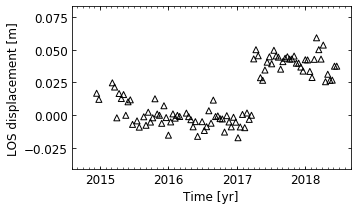

In [11]:
# plot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[5, 3])
ax.scatter(dates, dis, marker='^', s=6**2, facecolors='none', edgecolors='k', linewidth=1.)
# axis format
pp.auto_adjust_xaxis_date(ax, obj.times, fontsize=font_size)
ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
ax.set_xlabel('Time [yr]', fontsize=font_size)
ax.set_ylabel('LOS displacement [m]', fontsize=font_size)
# save
out_file = 'test.png'
plt.savefig(out_file, bbox_inches='tight', transparent=True, dpi=fig_dpi)
print('save to file: '+out_file)
plt.show()